# Datan analysointi K2020_2 - Tehtävät kerta 6 - RATKAISUT

Palauta Optiman palautuslaatikkoon viimeistään su 29.3. Kirjoita palautuslaatikon kommenttikenttään, mitkä tehtävät olet tehnyt kokonaan/osittain.

Opiskelijan nimi:

## 1. Sekunnit aikaleimoiksi
Tiedostossa http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/gps.txt on gps-koordinaatteja ja niille aikaleimoja:

**t401.444483900_1490796_6272051_S36.**

  * **t401** = laitteen id (merkkijono)
  * **444483900** = UTC-aika sekunteina vuoden 2006 alusta eli 1.1.2006 00:00:00 (kokonaislukuna)
  * **1490796** = pituusaste*50000 (kokonaislukuna)
  * **6272051** = leveysaste*100000 (kokonaislukuna)
  * **S36** = nopeus (km/h) * 10 (kokonaislukuna)
  
laiteid:n jälkeen siis on aina piste ja muissa väleissä alaviiva. Nopeuslukeman edessä on aina kirjain S ja rivin lopussa piste.

Pura tiedosto DataFrameen, jossa on sarakkeet
  * laitteen id
  * aikaleima Timestampina Suomen aikaa joka on tuolloin ollut 2 tuntia edessä UTC-aikaa
  * pituusaste asteina
  * leveysaste asteina
  * nopeus km/h
  
Mallia alusta:
![malli1](http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/malli1.png)

In [1]:
import pandas as pd
from datetime import timedelta

df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/gps.txt', sep='.', header=None)

df.columns = ['id', 'loput','s']
df['aikaraw'] = df['loput'].str.split('_').str[0].astype(int)

alku  = pd.to_datetime('2006-01-01 00:00:00')

df['aika'] = alku + pd.to_timedelta(df['aikaraw']+2*3600, 's')

df['pituusaste'] = df['loput'].str.split('_').str[1].astype(float)/50000.0
df['leveysaste'] = df['loput'].str.split('_').str[2].astype(float)/100000.0
df['nopeus'] = df['loput'].str.split('_').str[3].str[1:].astype(float)/10.0



df.drop(['loput', 's', 'aikaraw'], axis=1, inplace=True)

df.head()

,id,aika,pituusaste,leveysaste,nopeus
0,t401,2020-02-01 13:45:00,29.81592,62.72051,3.6
1,t401,2020-02-01 13:45:02,29.81584,62.72052,7.6
2,t401,2020-02-01 13:45:04,29.81580,62.72054,5.4
3,t401,2020-02-01 13:45:06,29.81580,62.72054,0.0
4,t401,2020-02-01 13:45:08,29.81580,62.72054,0.0


## 2. Jalkapalloa

Lue tiedosto http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/epl20200309.txt , jossa on Valioliigan ottelut kaudesta 1993-1994 tammikuuhun 2020 DataFrameen.

Listaa ensin minä kalenterikuukausina on pelattu eniten otteluita.  
Pitäisi tulla:
```
2017-12    69
2018-12    69
1994-04    68
2001-12    65
2013-12    64
1994-12    64
2006-12    64
```


Selvitä sitten minä **kalenteriviikkoina (ma-su)** on pelattu eniten otteluita.
Yritä saada otsikoitua viikot alkamispäivän mukaan, jolloin tulokseksi pitäisi saada:  
```
1994-12-26    31  
2005-12-26    27  
1993-12-27    27  
1993-08-16    22  
1993-08-23    22  
```
(huomioi että vuodenvaihteessa saman kalenteriviikon päivät ovat usein eri vuosina)

Laske vielä kuinka paljon otteluita on pelattu eri viikonpäivinä:  
```
ma     680
ti     505
ke     912
to      79
pe      99
la    6104
su    1953
```

In [2]:
import pandas as pd

df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/epl20200309.txt', parse_dates=['Date'], sep=';')

#kuukaudet periodeina
kkt  = df.resample('M', on='Date', kind='period').size()
print(kkt.sort_values(ascending=False).head(10))

print('\n-------------------\n')

# label='left' antaisi viikkoa edeltävän päivän, siksi loffset='1d'
vkot  = df.resample('W', on='Date', label='left', loffset='1d').size()

print(vkot.sort_values(ascending=False).head(10))


print('\n-------------------\n')

# tämä ratkaisu antaa vähän eri tuloksen johtue %W-määrityksestä:
# "All days in a new year preceding the first Monday are considered to be in week 0."
# niinpä 1993-12-27 alkavalta viikolta osa otteluista menee viikolle 1993-52 ja osa 1994-0
df['Year-Week'] = df['Date'].dt.strftime('%Y-%W')
print(df['Year-Week'].value_counts().head())


print('\n-------------------\n')

df['wd'] = df['Date'].dt.weekday

wds = df['wd'].value_counts(sort=False)
print(wds.set_axis(['ma', 'ti', 'ke', 'to', 'pe', 'la', 'su'], axis=0, inplace=False))

Date
2018-12    69
2017-12    69
1994-04    68
2001-12    65
2006-12    64
1994-12    64
2013-12    64
2019-12    63
2007-12    61
2014-12    60
Freq: M, dtype: int64

-------------------

Date
1994-12-26    31
1993-12-27    27
2005-12-26    27
1993-08-16    22
1993-08-23    22
2010-12-27    21
2002-12-23    21
1994-08-22    21
2013-12-23    21
2003-12-22    20
dtype: int64

-------------------

1994-52    31
2005-52    27
1993-33    22
1993-34    22
1994-34    21
Name: Year-Week, dtype: int64

-------------------

ma     680
ti     505
ke     912
to      79
pe      99
la    6104
su    1953
Name: wd, dtype: int64


# 3. Liigavire
Tiedostossa http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/liiga.txt on SM-liigan (nyk. Liiga) runkosarjan ottelutukset kaudesta 2010-2011 kauden 2019-2020 maaliskuun alkuun.

huom. -sarakkeessa on merkintä JA tai VL, jos ottelu on ratkennut vasta jatkoajalla tai voittomaalikilpailussa.

Voittanut (enemmän maaleja tehnyt joukkue) saa 3 pistettä ja hävinnyt 0 pistettä, paitsi jos ottelu on ratkennut vasta jatkoajalla tai voittomaalikilpailussa, voittanut joukkue saa 2 pistettä ja hävinnyt yhden pisteen.


Laske jokaisen JYP:n ottelun kohdalle paljonko JYP on saanut pisteitä edellisestä 15 ottelustaan ja piirrä näistä tiedoista piste-viivakaavio, jossa vaaka-akselilla on ottelun päiväys.

(kaavioon tulee siis n. 6 kk katkoja kausien välillä koska runkosarjaotteluia ei pelata huhti-elokuussa)

Malli:
![malli3](http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/malli3.png)

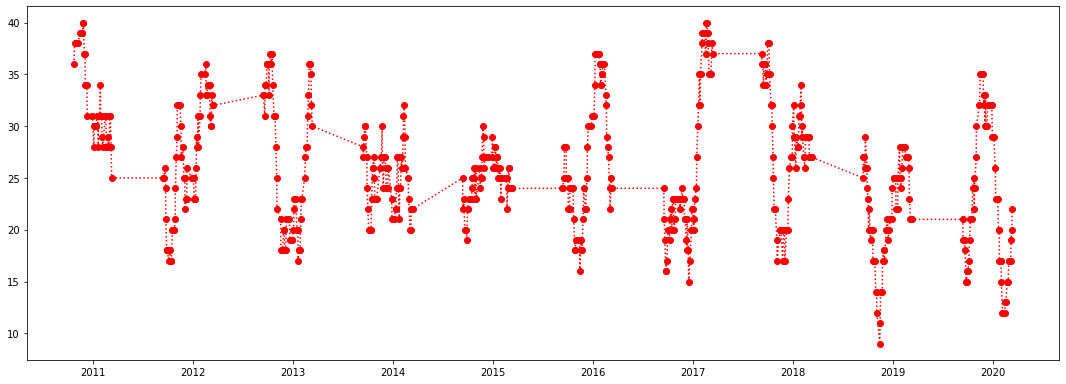

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/liiga.txt', parse_dates=['pvm'], dayfirst=True)

df['kotij'] = df['ottelu'].str.split('-').str.get(0).str.strip()  # stripillä ylimääräiset välilyönnit pois alusta/lopusta
df['vierasj'] = df['ottelu'].str.split('-').str.get(1).str.strip() 
df['kotim'] = df['tulos'].str.split('-').str.get(0).astype(int)
df['vierasm'] = df['tulos'].str.split('-').str.get(1).astype(int)

df['kotipist'] = 0
df['vieraspist'] = 0

df.loc[(df['huom'].isnull()) & (df['kotim']>df['vierasm']), 'kotipist'] = 3
df.loc[(df['huom'].isnull()) & (df['kotim']<df['vierasm']), 'vieraspist'] = 3

df.loc[(df['huom'].notnull()) & (df['kotim']>df['vierasm']), 'kotipist'] = 2
df.loc[(df['huom'].notnull()) & (df['kotim']<df['vierasm']), 'kotipist'] = 1
df.loc[(df['huom'].notnull()) & (df['kotim']>df['vierasm']), 'vieraspist'] = 1
df.loc[(df['huom'].notnull()) & (df['kotim']<df['vierasm']), 'vieraspist'] = 2



# otetaan vain JYPin ottelut
df = df[(df['kotij']=='JYP') | (df['vierasj']=='JYP')]
df.loc[df['kotij']=='JYP','JYPpisteet'] = df['kotipist']
df.loc[df['vierasj']=='JYP','JYPpisteet'] = df['vieraspist']



df['vire']=df['JYPpisteet'].rolling(15).sum()


fig, ax = plt.subplots()

fig.set_size_inches(18.5, 6.5)
plt.plot(df['pvm'], df['vire'], 'ro:')



plt.show()

## 4. Kilometrit

Tiedostossa http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/km.txt  on erään kuntoilijan päivittäisiä kilometrimääriä kesiltä 2015-2019.

Lue tiedosto ja laske jokaiselle päivälle toukokuun alusta lokakuun loppuun kuinka paljon enemmän tai vähemmän vuonna 2019 on kertynyt kilometreja kesän alusta verrattuna vuosiin 2015... 2018. Piirrä samaan kaavioon ero jokaiseen aikaisempaan vuoteen.

(huomaa että kilometrejä ei ole kertynyt läheskään jokainen päivä, mutta joka päivälle pitäisi saada ero laskettua)

Malli:
![malli4](http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/malli4.png)

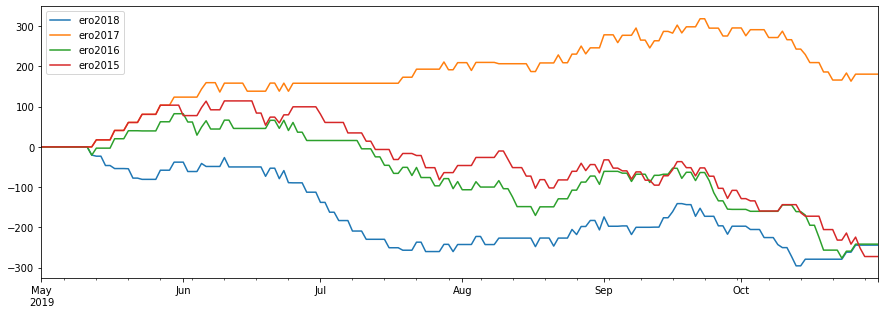

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/km.txt', parse_dates=['pvm'], index_col='pvm')

df.head()

# tähän dataframeen lasketaan kertymät ja erot, tähän tulee kesän jokainen päivä
df2 = pd.DataFrame(index=pd.date_range('2019-05-01', '2019-10-31'))

df2[2019] = df[df.index>'20190430'].sort_index()['km'].cumsum()
df2[2018]= df[(df.index>'20180430') & (df.index<'20181101')].sort_index().tshift(365, freq='D')['km'].cumsum()
df2[2017]= df[(df.index>'20170430') & (df.index<'20171101')].sort_index().tshift(2*365, freq='D')['km'].cumsum()
df2[2016]= df[(df.index>'20160430') & (df.index<'20161101')].sort_index().tshift(3*365, freq='D')['km'].cumsum()
df2[2015]= df[(df.index>'20150430') & (df.index<'20151101')].sort_index().tshift(4*365, freq='D')['km'].cumsum()

# tarkasti ajatellen tämä taitaa mennä väärin, koska 2016 on ollut karkausvuosi, 2015-sarakkeeseen pitäisi laittaa tshift(4*365+1...

# eka riville laitetaan kaikkiin nollaksi
df2.loc['2019-05-01', :] = 0

# täytetään tyhjät päivät edellisen päivän kertymällä
df2.fillna(method='ffill', inplace=True)

df2['ero2018'] = df2[2019] - df2[2018]
df2['ero2017'] = df2[2019] - df2[2017]
df2['ero2016'] = df2[2019] - df2[2016]
df2['ero2015'] = df2[2019] - df2[2015]


df2[['ero2018','ero2017', 'ero2016', 'ero2015']].plot(figsize=(15,5))

plt.show()

## 5. access.log
Tiedostossa http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/accesslog.zip on eräästä access.log-tiedostosta poimittuja tietoja (ip-osoite, aika ja eventid).

Tee tiedoista kaavio, joka kertoo kuinka monta **eri ip-osoitetta** on ollut kussakin kuudessa eventissä 5 minuutin jaksoissa näytteistettynä (eli esim montako eri ip-osoitetta on välillä 11:30:00-11:34:59).

Voit joutua käyttämään omaa date_parser-funktiota. 

Malli:  
![malli5](http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/malli5.png)

eventid         timestamp          
20180508_MQ_MA  2018-05-08 10:55:00     20
                2018-05-08 11:00:00     54
                2018-05-08 11:05:00    105
                2018-05-08 11:10:00    149
                2018-05-08 11:15:00    165
                                      ... 
20180508_MQ_WC  2018-05-08 13:40:00     34
                2018-05-08 13:45:00     29
                2018-05-08 13:50:00     29
                2018-05-08 13:55:00     29
                2018-05-08 14:00:00     23
Name: ip, Length: 228, dtype: int64


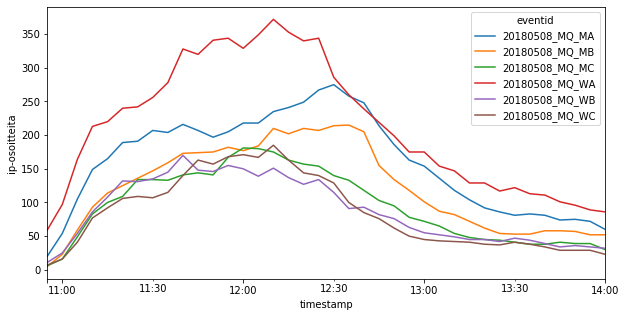

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


dateparser = lambda x: pd.datetime.strptime(x, '%d/%b/%Y:%H:%M:%S')

df = pd.read_csv('http://student.labranet.jamk.fi/~varpe/datananal2k2020/kerta6/accesslog.zip', parse_dates=['timestamp'], index_col='timestamp', date_parser=dateparser) 
  
# groupby ja resample "peräkkäin" antaa Serieksen 2-tasoisella indeksillä    
print(df.groupby('eventid')['ip'].resample('5min').nunique())

# unstack siirtää 2-tasoisesta indeksistä toisen sarakkeiksi 
df.groupby('eventid')['ip'].resample('5min').nunique().unstack().T.plot(figsize=(10,5))

plt.ylabel('ip-osoitteita')

plt.show()